In [1]:
import sys
from os import path, chdir
from collections import defaultdict
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt


sys.path.append('..')

from utils.meta_util import load_meta_infos, collect_by, filter_by
from utils.tensor_holders import TensorHolder
from utils.plot_util import plot, legend

chdir('..')
plot_dir = 'notebooks'

## Load results

In [2]:
results = load_meta_infos(path.join('results'))
pprint(results)

[{'batch_size': 32,
  'compute_perf': True,
  'compute_variance': True,
  'dataset': 'cancer',
  'device': 'cuda',
  'distribution': 'MultivariateNormal',
  'epochs': 20,
  'learning_rate': 0.001,
  'mc_estimator': 'MVD',
  'path': 'results\\logreg\\cancer\\MVD\\1\\2930489',
  'plot_label': '$mc_estimator$ $sample_size$ sample(s)',
  'revision': '7700974d48507f045c90efc453bb031b4b57e600',
  'sample_size': 1,
  'saved_tensors': ['train_loss',
                    'test_loss',
                    'estimator_times',
                    'estimators_stds'],
  'seed': 2930489,
  'subpath_keys': ['mc_estimator', 'sample_size'],
  'task': 'logreg'},
 {'batch_size': 32,
  'compute_perf': True,
  'compute_variance': True,
  'dataset': 'cancer',
  'device': 'cuda',
  'distribution': 'MultivariateNormal',
  'epochs': 20,
  'learning_rate': 0.001,
  'mc_estimator': 'MVD',
  'path': 'results\\logreg\\cancer\\MVD\\1\\4063329',
  'plot_label': '$mc_estimator$ $sample_size$ sample(s)',
  'revision': '77

# Plot VAE MNIST Test Losses

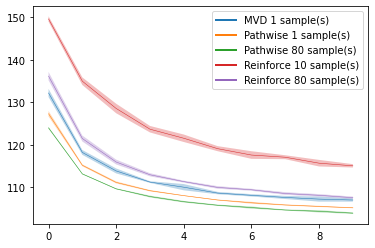

In [3]:
task = 'vae'

test_losses = defaultdict(list)
for k, v in collect_by(filter_by(results, task=task, dataset='mnist'), 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder(meta['path'], 'test_loss')))
test_losses.default_factory = None

for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    for meta, loss in run:
        losses.append(loss.numpy())
    losses = np.array(losses)
    plot(losses.mean(axis=0), losses.std(axis=0), meta)

legend()
plt.savefig(path.join(plot_dir, f'{task}_test_losses'))
plt.show()

# Plot VAE MNIST Train Losses

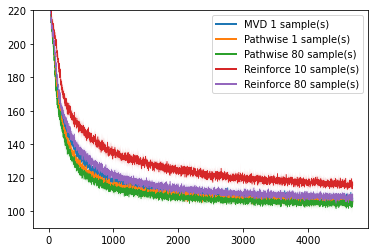

In [4]:
task = 'vae'

test_losses = defaultdict(list)
for k, v in collect_by(filter_by(results, task=task, dataset='mnist'), 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder(meta['path'], 'train_loss')))
test_losses.default_factory = None

for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    for meta, loss in run:
        losses.append(loss.numpy())
    losses = np.array(losses)
    plot(losses.mean(axis=0), losses.std(axis=0), meta)

legend()
plt.ylim(90, 220)
plt.savefig(path.join(plot_dir, f'{task}_train_losses'))
plt.show()

# Plot Logistic Regression Test Loss

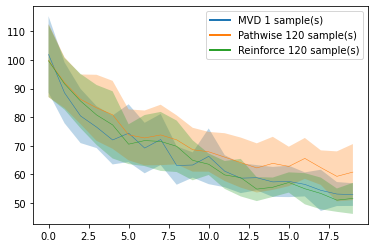

In [5]:
task = 'logreg'

test_losses = defaultdict(list)
for k, v in collect_by(filter_by(results, task=task), 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder(meta['path'], 'test_loss')))
test_losses.default_factory = None

for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    for meta, loss in run:
        losses.append(loss.numpy())
    losses = np.array(losses)
    plot(losses.mean(axis=0), losses.std(axis=0), meta)

legend()
plt.savefig(path.join(plot_dir, f'{task}_test_losses'))
plt.show()

# Plot Logistic Regression Train Loss

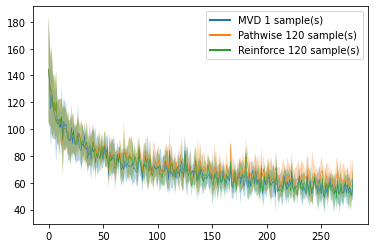

In [8]:
task = 'logreg'

test_losses = defaultdict(list)
for k, v in collect_by(filter_by(results, task=task), 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder(meta['path'], 'train_loss')))
test_losses.default_factory = None

for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    for meta, loss in run:
        losses.append(loss.numpy())
    losses = np.array(losses)
    plot(losses.mean(axis=0), losses.std(axis=0), meta)

legend()
plt.savefig(path.join(plot_dir, f'{task}_train_losses'))
plt.show()